# Explore here

In [15]:
# Importación 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pickle import dump

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

# Cargar datos
ruta_datos = '/workspace/-rbol-de-decision/data/raw/diabetes.csv' 
diabetes = pd.read_csv(ruta_datos)

# Mostrar las primeras filas y la estructura del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(diabetes.head())
print("\nEstructura del conjunto de datos:")
print(diabetes.info())


Primeras filas del conjunto de datos:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Estructura del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies

# Exploratory Data Analysis (EDA)

Nuestro dataframe contiene 768 filas y 9 características.

Primeras filas del dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Resumen de la estructura del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ---

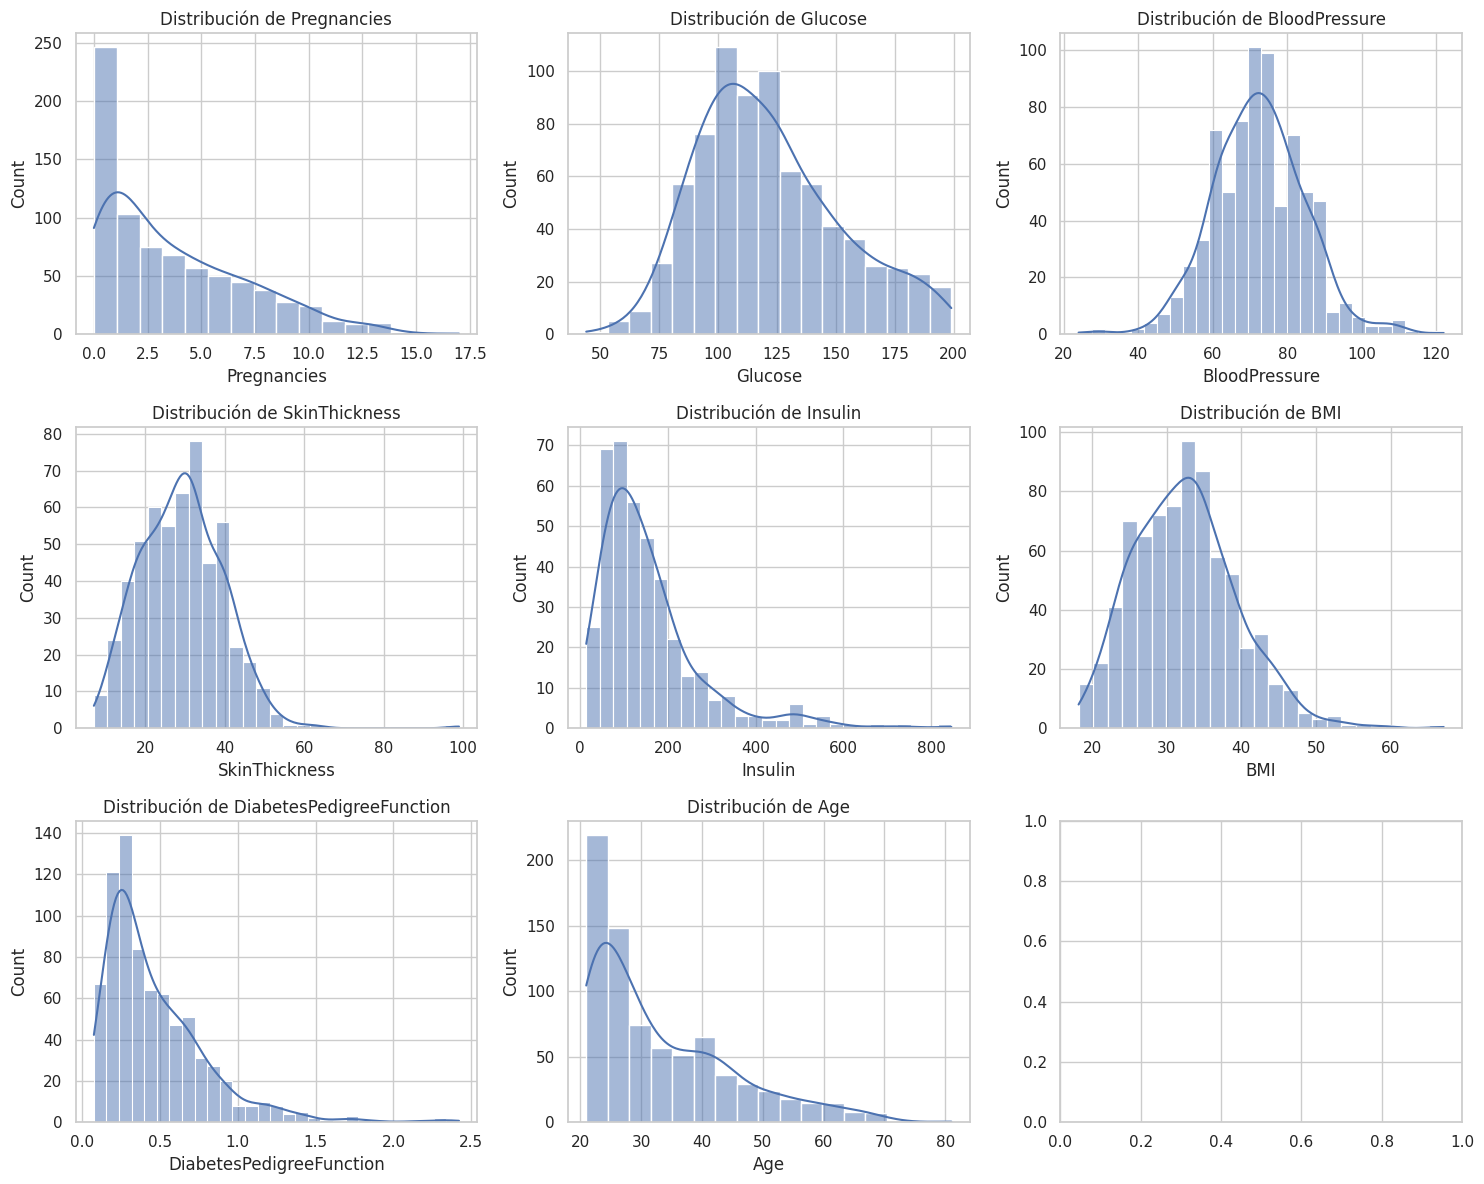

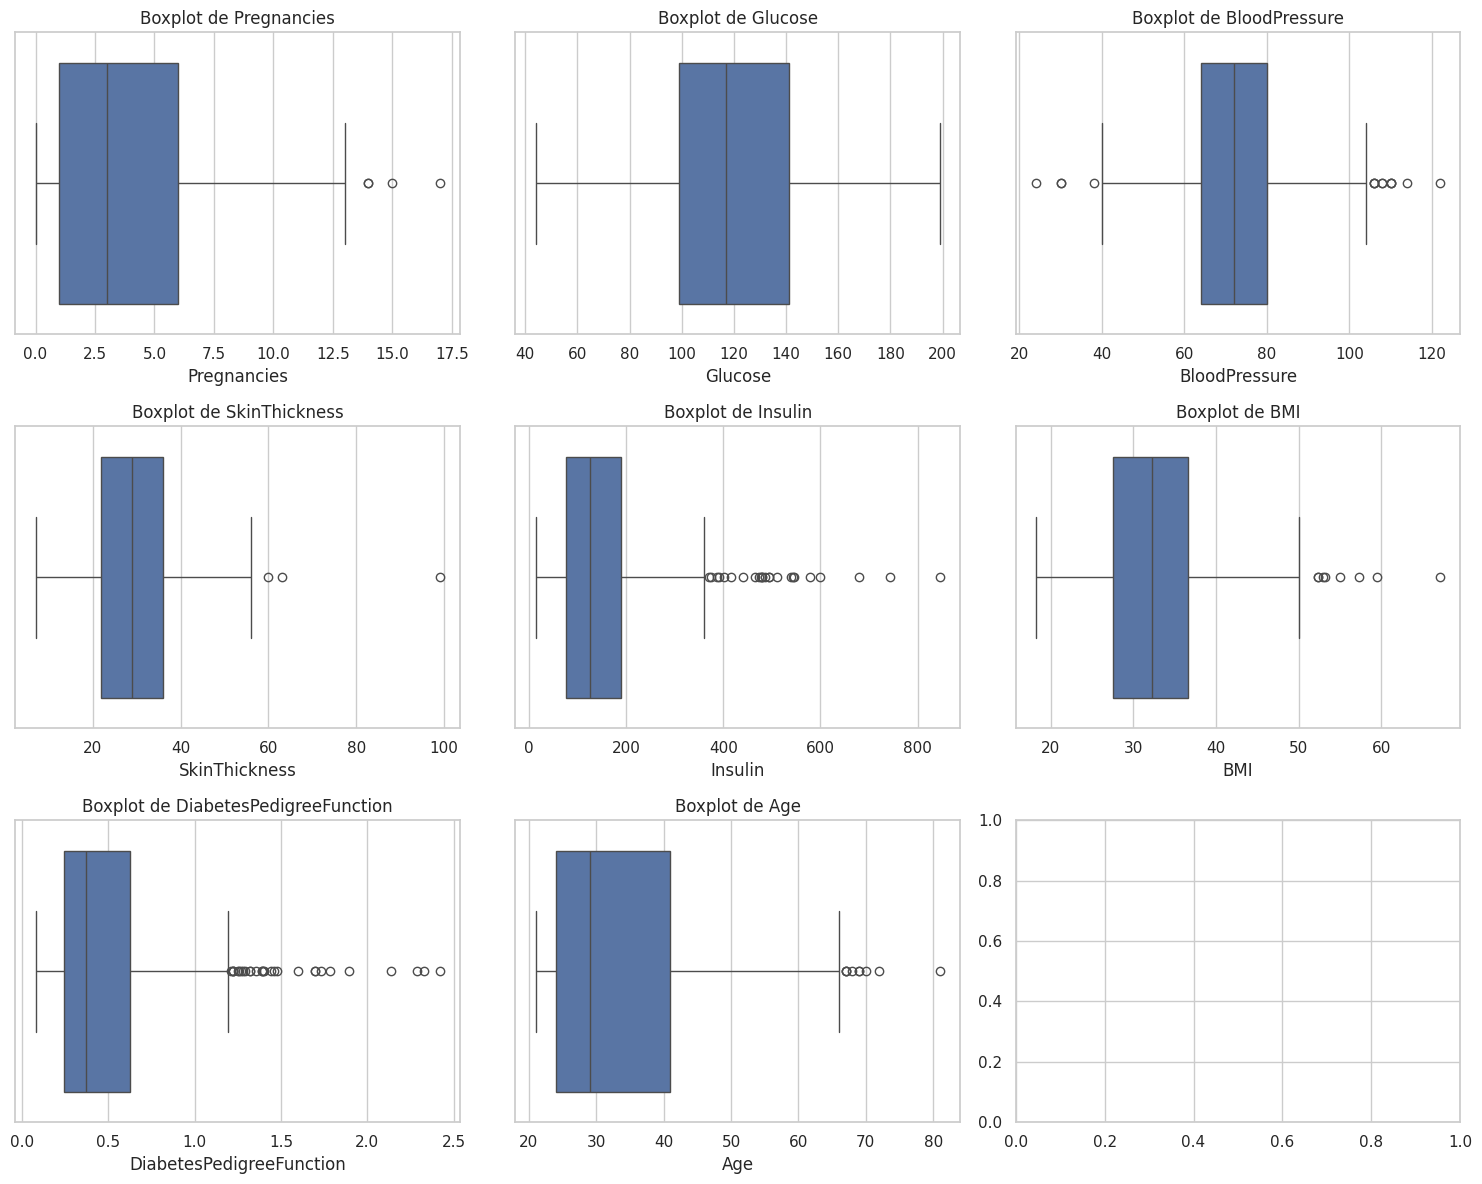

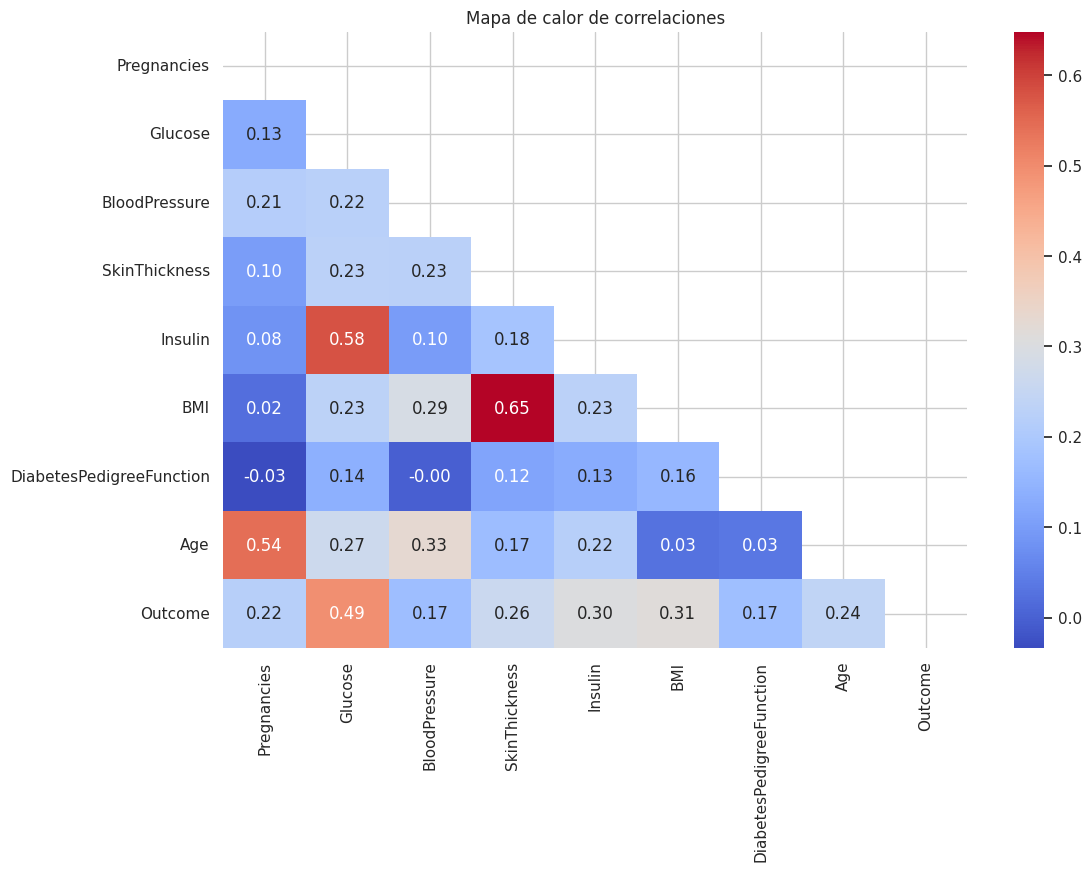

In [ ]:

# Configuración general
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# Cargar datos
ruta_datos = '/workspace/-rbol-de-decision/data/raw/diabetes.csv'
df = pd.read_csv(ruta_datos)

# Exploración inicial de datos
print(f"Nuestro dataframe contiene {len(df)} filas y {df.shape[1]} características.\n")
print("Primeras filas del dataset:")
print(df.head())
print("\nResumen de la estructura del conjunto de datos:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe().round(2))

# Identificación de valores nulos
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

# Detección de ceros en variables donde no deberían existir
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zeros:
    print(f"{col}: {len(df[df[col] == 0])} valores de 0 encontrados.")

# Reemplazo de ceros 
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

# Visualización de distribuciones
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, col in enumerate(df.columns[:-1]):  # Excluir Outcome
    sns.histplot(df[col], kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

# Análisis de valores atípicos
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(x=df[col], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

# Análisis multivariante
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(df.corr()))
plt.title("Mapa de calor de correlaciones")
plt.show()


# Preparación del modelo

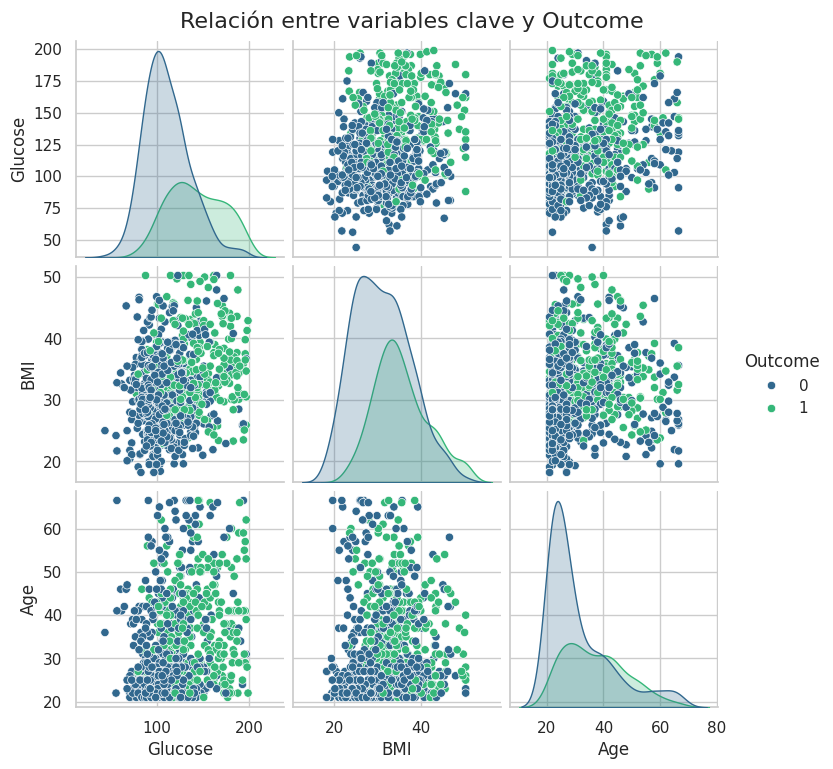

Pregnancies - Límites ajustados: [-6.50, 13.50]
Glucose - Límites ajustados: [36.00, 204.00]
BloodPressure - Límites ajustados: [40.00, 104.00]
SkinThickness - Límites ajustados: [1.00, 57.00]
Insulin - Límites ajustados: [-94.38, 360.62]
BMI - Límites ajustados: [13.85, 50.25]
DiabetesPedigreeFunction - Límites ajustados: [-0.33, 1.20]
Age - Límites ajustados: [-1.50, 66.50]
Glucose_BMI_ratio - Límites ajustados: [0.78, 6.86]
Age_Pregnancies_ratio - Límites ajustados: [-5.01, 22.21]

Primeras filas con las nuevas características:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from joblib import dump
import numpy as np

# --- Visualización de la relación entre variables clave ---
sns.pairplot(df, hue="Outcome", vars=["Glucose", "BMI", "Age"], palette="viridis")
plt.suptitle("Relación entre variables clave y Outcome", y=1.02, fontsize=16)
plt.show()

# Manejo de outliers
def ajustar_outliers(x, feature_name):
    """
    Limita los valores atípicos a los límites intercuartílicos (IQR).
    """
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    print(f"{feature_name} - Límites ajustados: [{lower_limit:.2f}, {upper_limit:.2f}]")
    return x.clip(lower=lower_limit, upper=upper_limit)

# Aplicar ajuste de outliers
for col in df.select_dtypes(include=np.number).columns:
    if col != "Outcome":  # Excluir columna objetivo
        df[col] = ajustar_outliers(df[col], col)

# Creación de nuevas características
df["Glucose_BMI_ratio"] = df["Glucose"] / df["BMI"]
df["Age_Pregnancies_ratio"] = df["Age"] / (df["Pregnancies"] + 1)  # Evitar división por cero

print("\nPrimeras filas con las nuevas características:")
print(df.head())

# Preparación de datos para el modelo
# Dividir en características (X) y objetivo (y)
X = df.drop(columns="Outcome")
y = df["Outcome"]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalización y escalado
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Guardar scalers para uso futuro
dump(scaler_standard, open("/workspace/-rbol-de-decision/data/processed/scaler_standard.pkl", "wb"))
dump(scaler_minmax, open("/workspace/-rbol-de-decision/data/processed/scaler_minmax.pkl", "wb"))

# Guardar conjuntos escalados para pruebas futuras
dump(X_train_minmax, "/workspace/-rbol-de-decision/data/processed/minmax_with_outliers.sav")
dump(X_train_standard, "/workspace/-rbol-de-decision/data/processed/standard_with_outliers.sav")

print("\nConjuntos de datos preparados para modelado.")
print(f"X_train_minmax shape: {X_train_minmax.shape}")
print(f"X_train_standard shape: {X_train_standard.shape}")

# Revisar si va bien el escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Asegúrate de haber escalado correctamente los datos antes de usarlos
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Escalar los datos
X_train_with_outliers_norm = pd.DataFrame(
    scaler_standard.fit_transform(X_train_with_outliers),
    columns=X_train_with_outliers.columns
)
X_test_with_outliers_norm = pd.DataFrame(
    scaler_standard.transform(X_test_with_outliers),
    columns=X_test_with_outliers.columns
)

X_train_without_outliers_norm = pd.DataFrame(
    scaler_standard.fit_transform(X_train_without_outliers),
    columns=X_train_without_outliers.columns
)
X_test_without_outliers_norm = pd.DataFrame(
    scaler_standard.transform(X_test_without_outliers),
    columns=X_test_without_outliers.columns
)

# MinMaxScaler
X_train_with_outliers_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(X_train_with_outliers),
    columns=X_train_with_outliers.columns
)
X_test_with_outliers_minmax = pd.DataFrame(
    scaler_minmax.transform(X_test_with_outliers),
    columns=X_test_with_outliers.columns
)

X_train_without_outliers_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(X_train_without_outliers),
    columns=X_train_without_outliers.columns
)
X_test_without_outliers_minmax = pd.DataFrame(
    scaler_minmax.transform(X_test_without_outliers),
    columns=X_test_without_outliers.columns
)

# Confirmar las formas de los conjuntos escalados
print("Datos escalados correctamente:")
print(f"X_train_with_outliers_norm shape: {X_train_with_outliers_norm.shape}")
print(f"X_test_with_outliers_norm shape: {X_test_with_outliers_norm.shape}")

# Filtrar columnas seleccionadas en los conjuntos escalados
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_without_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_with_outliers_sel.columns]


# Modelo de árbol de decisión

In [35]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from joblib import dump

# --- Selección de características ---
def kselection(X_train, X_test, y_train, k, reference: str):
    """
    Selecciona las k mejores características usando SelectKBest y f_classif.
    Guarda el modelo de selección para referencia futura.
    """
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()  # Máscara booleana de columnas seleccionadas

    # Filtrar columnas seleccionadas
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[cols])
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_train.columns[cols])

    # Guardar el modelo de selección
    dump(selection_model, f'/workspace/-rbol-de-decision/data/processed/selection_model_{reference}.sav')
    print(f"Modelo de selección guardado: selection_model_{reference}.sav")

    return X_train_sel, X_test_sel

# Aplicar selección de características (ejemplo con k=5)
k = 5
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(
    X_train_with_outliers_norm, X_test_with_outliers_norm, y_train, k=k, reference="with_outliers"
)

X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(
    X_train_without_outliers_norm, X_test_without_outliers_norm, y_train, k=k, reference="without_outliers"
)

# Aplicar el filtro a los datos escalados (si es necesario)
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]

X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

# Guardar conjuntos de datos procesados
dfs_train = {
    "X_train_with_outliers_sel": X_train_with_outliers_sel,
    "X_train_without_outliers_sel": X_train_without_outliers_sel,
    "X_train_with_outliers_minmax_sel": X_train_with_outliers_minmax_sel,
    "X_train_without_outliers_minmax_sel": X_train_without_outliers_minmax_sel,
}

dfs_test = {
    "X_test_with_outliers_sel": X_test_with_outliers_sel,
    "X_test_without_outliers_sel": X_test_without_outliers_sel,
    "X_test_with_outliers_minmax_sel": X_test_with_outliers_minmax_sel,
    "X_test_without_outliers_minmax_sel": X_test_without_outliers_minmax_sel,
}

# Guardar los conjuntos en CSV
for name, df in dfs_train.items():
    df.to_csv(f"/workspace/-rbol-de-decision/data/processed/{name}.csv", index=False)

for name, df in dfs_test.items():
    df.to_csv(f"/workspace/-rbol-de-decision/data/processed/{name}.csv", index=False)

# --- Evaluación del modelo ---
# Entrenar y evaluar modelos con diferentes conjuntos
results = []

# Verificar que las claves coincidan entre dfs_train y dfs_test
for train_name, train_df in dfs_train.items():
    if train_name not in dfs_test:
        print(f"Advertencia: {train_name} no tiene un conjunto de prueba correspondiente.")
        continue

    test_df = dfs_test[train_name]  # Obtener el conjunto de prueba correspondiente
    model = DecisionTreeClassifier(random_state=123)
    model.fit(train_df, y_train)
    y_test_pred = model.predict(test_df)

    accuracy = round(accuracy_score(y_test, y_test_pred), 4)
    results.append({
        'df_train': train_name,
        'Accuracy Score': accuracy
    })

# Ordenar resultados por precisión
results = sorted(results, key=lambda x: x['Accuracy Score'], reverse=True)
best_result = results[0]
print(f"Mejor conjunto: {best_result['df_train']} con precisión: {best_result['Accuracy Score']}")

# --- Optimización del modelo ---
hyperparams = {
    "splitter": ["best"],
    "max_depth": [15, 20, 25, 30, 35],
    "min_samples_split": [2, 3, 4, 5],
    "random_state": [123],
    "min_weight_fraction_leaf": [0.01, 0.015, 0.025, 0.05, 0.075, 0.1]
}

best_model = DecisionTreeClassifier(random_state=123)
grid = GridSearchCV(best_model, hyperparams, scoring="accuracy", cv=3)
grid.fit(dfs_train[best_result['df_train']], y_train)
print(f"Mejores hiperparámetros: {grid.best_params_}")

# Entrenar el modelo optimizado
final_model = grid.best_estimator_
final_model.fit(dfs_train[best_result['df_train']], y_train)

# Predecir con el modelo optimizado
y_pred = final_model.predict(dfs_test[best_result['df_train']])
final_accuracy = round(accuracy_score(y_test, y_pred), 4)
print(f"Precisión del modelo optimizado: {final_accuracy}")

# --- Visualización del árbol ---
plt.figure(figsize=(14, 10))
plot_tree(final_model, feature_names=dfs_train[best_result['df_train']].columns, filled=True)
plt.title("Árbol de Decisión")
plt.show()

# Mostrar reglas del árbol
tree_rules = export_text(final_model, feature_names=list(dfs_train[best_result['df_train']].columns))
print(tree_rules)


Modelo de selección guardado: selection_model_with_outliers.sav
Modelo de selección guardado: selection_model_without_outliers.sav
Advertencia: X_train_with_outliers_sel no tiene un conjunto de prueba correspondiente.
Advertencia: X_train_without_outliers_sel no tiene un conjunto de prueba correspondiente.
Advertencia: X_train_with_outliers_minmax_sel no tiene un conjunto de prueba correspondiente.
Advertencia: X_train_without_outliers_minmax_sel no tiene un conjunto de prueba correspondiente.


IndexError: list index out of range